## Plots of all classification models: True vs Predicted values

In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
import yaml
import pprint
import matplotlib
import itertools
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from util import get_true_predicted_crossvalid, plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [3]:
from xrsdkit.tools.profiler import profile_keys
from xrsdkit.tools.ymltools import read_local_dataset
from util import *

In [35]:
used_features = []

In [5]:
df, idx_df = read_local_dataset('../xrsdkit_modeling/flowreactor_pd_nanoparticles/dataset', downsampling_distance=1) 

loading data from RxnA_20190329_0_xrsd_system.yml
loading data from RxnA_20190329_7_xrsd_system.yml
loading data from RxnA_20190329_10_xrsd_system.yml
loading data from RxnA_20190329_8_xrsd_system.yml
loading data from RxnA_20190329_6_xrsd_system.yml
loading data from RxnA_20190329_9_xrsd_system.yml
loading data from RxnA_20190329_11_xrsd_system.yml
loading data from RxnA_20190329_1_xrsd_system.yml
loading data from RxnA_20190329_4_xrsd_system.yml
loading data from RxnA_20190329_13_xrsd_system.yml
loading data from RxnA_20190329_14_xrsd_system.yml
loading data from RxnA_20190329_3_xrsd_system.yml
loading data from RxnA_20190329_15_xrsd_system.yml
loading data from RxnA_20190329_2_xrsd_system.yml
loading data from RxnA_20190329_5_xrsd_system.yml
loading data from RxnA_20190329_12_xrsd_system.yml
loading data from RxnD_201902_21_xrsd_system.yml
loading data from RxnD_201902_13_xrsd_system.yml
loading data from RxnD_201902_2_xrsd_system.yml
loading data from RxnD_201902_5_xrsd_system.yml


loading data from RxnE_201902_7_xrsd_system.yml
loading data from RxnE_201902_20_xrsd_system.yml
loading data from RxnE_201902_8_xrsd_system.yml
loading data from RxnE_201902_27_xrsd_system.yml
loading data from RxnE_201902_0_xrsd_system.yml
loading data from RxnE_201902_15_xrsd_system.yml
loading data from RxnE_201902_26_xrsd_system.yml
loading data from RxnE_201902_14_xrsd_system.yml
loading data from RxnE_201902_1_xrsd_system.yml
loading data from RxnE_201902_6_xrsd_system.yml
loading data from RxnE_201902_13_xrsd_system.yml
loading data from RxnE_201902_9_xrsd_system.yml
loading data from RxnE_201902_21_xrsd_system.yml
loading data from RxnB_20190329_12_xrsd_system.yml
loading data from RxnB_20190329_3_xrsd_system.yml
loading data from RxnB_20190329_20_xrsd_system.yml
loading data from RxnB_20190329_27_xrsd_system.yml
loading data from RxnB_20190329_4_xrsd_system.yml
loading data from RxnB_20190329_15_xrsd_system.yml
loading data from RxnB_20190329_28_xrsd_system.yml
loading data f

Finished downsampling: kept 17/17
Downsampling data for group: ('R1_201811', 'diffuse__diffuse')
Finished downsampling: kept 9/9
Downsampling data for group: ('R1_201811', 'diffuse__disordered')
Finished downsampling: kept 2/2
Downsampling data for group: ('R1_201811', 'unidentified')
Finished downsampling: kept 2/2
Downsampling data for group: ('R1_20190424', 'diffuse__diffuse')
Finished downsampling: kept 5/5
Downsampling data for group: ('R1_20190424', 'diffuse__diffuse__disordered')
Finished downsampling: kept 4/4
Downsampling data for group: ('R1_20190424', 'diffuse__disordered')
Finished downsampling: kept 1/1
Downsampling data for group: ('R2_201811', 'diffuse')
Finished downsampling: kept 2/2
Downsampling data for group: ('R2_201811', 'diffuse__diffuse')
Finished downsampling: kept 4/4
Downsampling data for group: ('R2_201811', 'diffuse__diffuse__disordered')
Finished downsampling: kept 4/4
Downsampling data for group: ('R2_201811', 'diffuse__disordered')
Finished downsampling:

### Binary Classifiers

In [6]:
b_cls, f = get_true_xvalid_binary_cls(df)
used_features.extend(f)

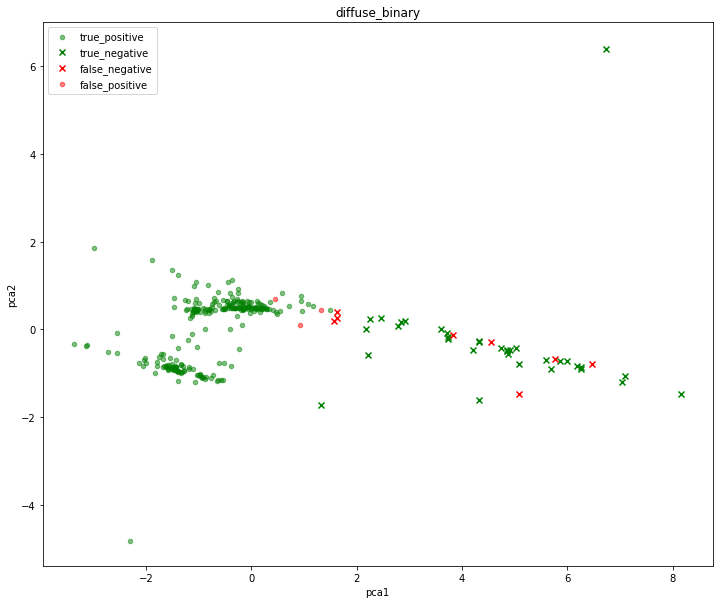

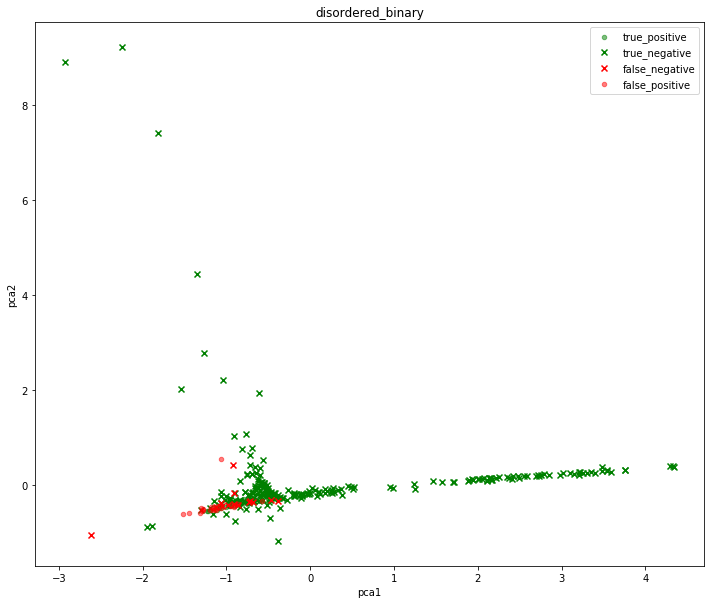

In [7]:
for k, v in b_cls.items():
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    x = v['pca1']
    y = v['pca2']
    r = np.array(v['compared'])
    plt.scatter(x[r==0], y[r==0],marker='o', c='green',s= 20,alpha=.5)
    plt.scatter(x[r==1], y[r==1],marker='x', c='green')
    plt.scatter(x[r==2], y[r==2],marker='x', c='red')
    plt.scatter(x[r==3], y[r==3],marker='o', c='red',s= 20,alpha=.5)
    ax.set_title(k)
    ax.set_xlabel('pca1')
    ax.set_ylabel('pca2')
    ax.legend(["true_positive", 'true_negative', 'false_negative', 'false_positive'])
    fig_name = k + '.pdf'
    plt.savefig(fig_name)

### Multicalss Classifiers

In [8]:
m_cls, f = get_true_xvalid_multiclass_cls(df)
used_features.extend(f)

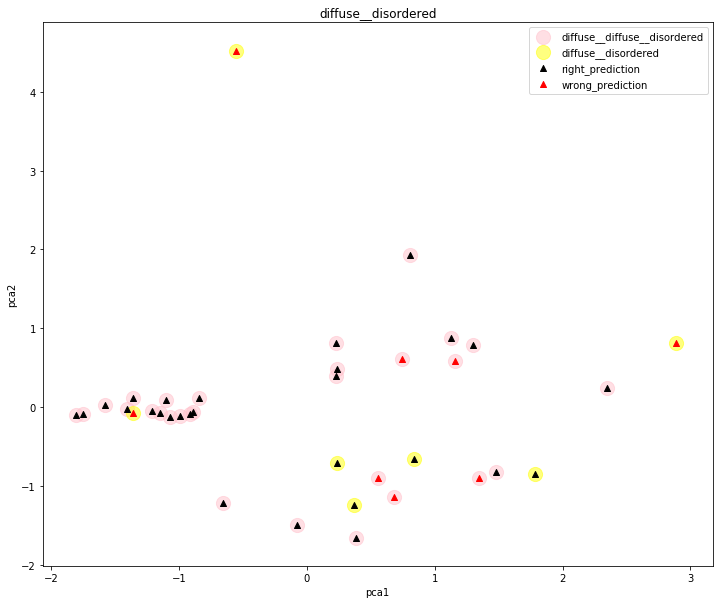

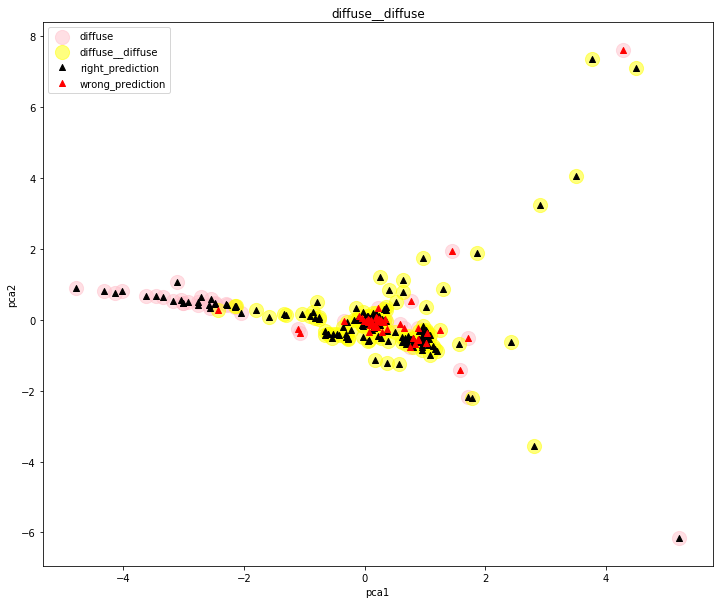

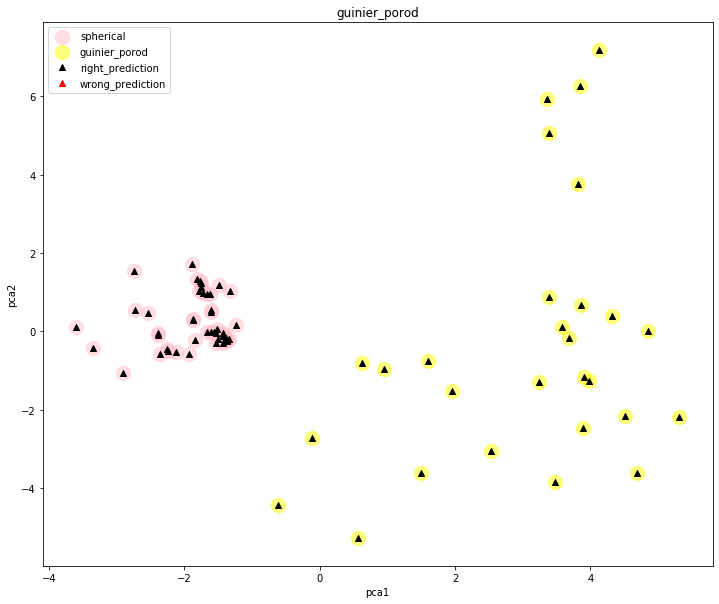

In [9]:
for k, v in m_cls.items():
    fig, ax = plt.subplots(1,1, figsize=(12,10))
    x = v['pca1']
    y = v['pca2']
    r = np.array(v['compared'])
    
    tr = np.array(v['true_y'])
    all_classes = set(v['true_y'])
    class_map = {}
    i = 0
    for c in all_classes:
        class_map[c] = i
        i+=1
        
    colors = ['pink', 'yellow', 'blue']
    
    for k, v in class_map.items():
        ax.scatter(x[tr==k],y[tr==k], c=colors[v],alpha=.5, label=k, s= 200)
    plt.scatter(x[r==0], y[r==0],marker='^', label='right_prediction', c='black')
    plt.scatter(x[r==1], y[r==1],marker='^', label= 'wrong_prediction', c='red')
    
    ax.set_title(k)
    ax.set_xlabel('pca1')
    ax.set_ylabel('pca2')
    #ax.legend(["right_predictions", 'wrong_predictions'])
    ax.legend()
    fig_name = k + '.pdf'
    plt.savefig(fig_name)

### Right vs Wrong predictions for the combination of system class and form factors.

In [10]:
data_ind = pandas.read_csv("dataset_index.csv")
data = pandas.read_csv("main_classifier_results.csv")
data = data.merge(data_ind[['sample_id','yml_file','data_file' ]], left_on='sample_id', right_on='sample_id')

In [11]:
form_factor = []
form_factor_pr = []
right_pred_ff = []

for index, row in data.iterrows():
    sys_cl_predicted = row['system_class_pr']
    exp = row['experiment_id']
    dat_file_name = row['data_file']
    yml_file_name = row['yml_file']
    yml_path = '../xrsdkit_modeling/flowreactor_pd_nanoparticles/dataset/' + exp + '/' + yml_file_name
    with open(yml_path, 'r') as stream:
        data_loaded = yaml.safe_load(stream)
    features = data_loaded['features']
    f = open('../xrsdkit_modeling/flowreactor_pd_nanoparticles/dataset/' + exp + '/' + dat_file_name,'r')
    q_I = np.loadtxt(f,dtype=float)
    pred = predict(features, sys_cl_predicted)
    sys_est = system_from_prediction(pred,q_I[: , 0],q_I[ :, 1],
            features = features,
            sample_metadata = data_loaded['sample_metadata'],
            fit_report = data_loaded['fit_report'])
    
    if q_I.shape[1] > 2:
        dI = q_I[:,2]
    else:
        dI = None
    
    all_true_pops = row['system_class'].split("__")
    all_true_forms = dict.fromkeys(all_true_pops)
    for k, v in all_true_forms.items():
        all_true_forms[k] = set()
        for k2, v2 in data_loaded.items():
            if 'structure' in v2 and v2['structure'] == k:
                all_true_forms[k].add(v2['form'])
    form_factor.append(all_true_forms)    
    
    all_pr_pops = row['system_class_pr'].split("__")
    all_pr_forms = dict.fromkeys(all_pr_pops)
    for k, v in all_pr_forms.items():
        all_pr_forms[k] = set()
        for k2, v2 in sys_est.to_dict().items():
            if 'structure' in v2 and v2['structure'] == k:
                all_pr_forms[k].add(v2['form'])
    form_factor_pr.append(all_pr_forms)
    
    # compare predicted and real set form factors:
    result = True
    if len(all_pr_forms)!= len(all_true_forms):
        result = False
    else:
        if set(all_pr_forms.keys())!= set(all_true_forms.keys()):
            result = False
        else:
            for k, v in all_true_forms.items():
                if v != all_pr_forms[k]:
                    result = False
    right_pred_ff.append(result)

In [12]:
data['form_factor'] = form_factor
data['form_factor_pr'] = form_factor_pr
data['right_pred_ff'] = right_pred_ff

In [13]:
data.to_csv("data_with_ff.csv")

In [14]:
data = pandas.read_csv("data_with_ff.csv")

In [16]:
data['right_pred_sys_cl'] = data['system_class'] == data['system_class_pr']

In [17]:
data = data.merge(df, left_on='sample_id', right_on='sample_id')

In [19]:
used_features = set(used_features)

scaler = StandardScaler()
scaler.fit(data[features])
scaled_data = scaler.transform(data[features])

In [20]:
len(set(used_features))

21

We used all existing features.

In [21]:
data['right_pred_sc_ff'] = data['right_pred_sys_cl']&data['right_pred_ff']

In [22]:
pca = doPCA(scaled_data,2)
transformed_data = pca.transform(scaled_data)
data['pca1'] = transformed_data[ : , 0]
data['pca2'] = transformed_data[ : , 1]

In [30]:
def find_sph_pops(x):
    if 'diffuse' in x and 'spherical'in x:
            return 1
    else:
        return 0
       
data['diff_shp_included'] = data.form_factor.apply(find_sph_pops)

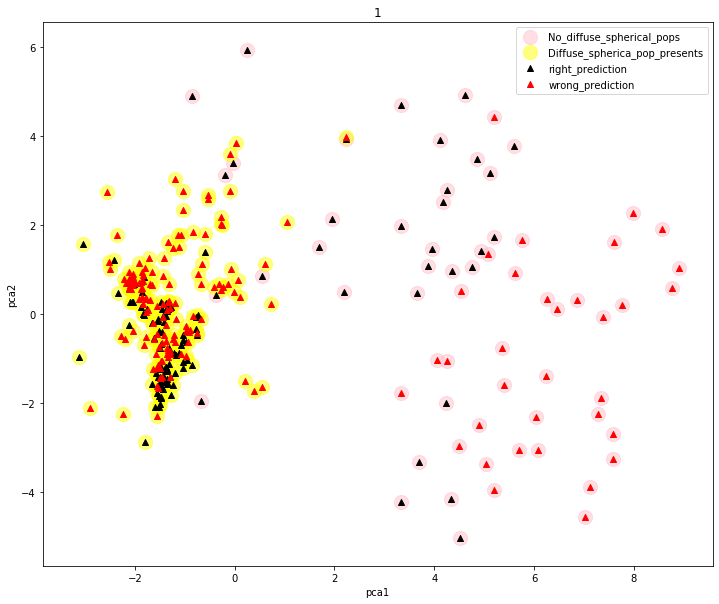

In [34]:
fig, ax = plt.subplots(1,1, figsize=(12,10))
x = data['pca1']
y = data['pca2']
r = np.array(data['right_pred_sc_ff'])
tr = np.array(data['diff_shp_included'])
    
all_classes = set(data['diff_shp_included'])
class_map = {}
i = 0
for c in all_classes:
    class_map[i] = c
    i+=1
    
labels = {1: 'Diffuse_spherica_pop_presents', 0: "No_diffuse_spherical_pops"}
        
colors = ['pink', 'yellow', 'blue']
    
for k in all_classes:
    ax.scatter(x[tr==k],y[tr==k], c=colors[k],alpha=.5, label=labels[k], s= 200)
plt.scatter(x[r==0], y[r==0],marker='^', label='right_prediction', c='black')
plt.scatter(x[r==1], y[r==1],marker='^', label= 'wrong_prediction', c='red')
    
ax.set_title(k)
ax.set_xlabel('pca1')
ax.set_ylabel('pca2')
ax.legend()
fig_name = 'systme_class_and_ff.pdf'
plt.savefig(fig_name)